<a href="https://colab.research.google.com/github/PashaIanko/RestrictedBolzmannMachine/blob/main/Omniglot_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Packages & Functions**

In [112]:
%%capture

url_dbn = 'https://raw.githubusercontent.com/PashaIanko/RestrictedBolzmannMachine/main/DBN.py'
url_rbm = 'https://raw.githubusercontent.com/PashaIanko/RestrictedBolzmannMachine/main/RBM.py'

utils = {
    'DBN.py': url_dbn,
    'RBM.py': url_rbm
}

for file, url in utils.items():
    !wget -O {file} {url} {file}

In [113]:
import torch
import torchvision as tv
from torchvision import datasets

# Models
from DBN import DBN

# Plotting
import matplotlib.pyplot as plt

# Download
from google.colab import drive
from os import path

# Utils
import numpy as np
import random
import math

In [ ]:
def fix_seeds():
    torch.manual_seed(0)
    random.seed(0)
    np.random.seed(0)

In [ ]:
def visualize_symbols(dataset, n_subplots):
    n_rows_cols = int(math.sqrt(n_subplots))
    fig, axes = plt.subplots(
        n_rows_cols, 
        n_rows_cols, 
        sharex = True,
        sharey = True,
        figsize = (10, 10)
    )
    for i in range(n_subplots):
        row = i % n_rows_cols
        col = i // n_rows_cols
        img, _ = dataset[i] 
        axes[row, col].imshow(torch.flatten(img).reshape((105, 105)), cmap='binary')

## **Data Download**

- For neural networks, we need to scale data before learning
- Need to obtain tensor shape
- Fix seeds for reproducibility

In [ ]:
fix_seeds()

transformer = tv.transforms.Compose(
    [
        # tv.transforms.CenterCrop(7),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize(mean=(0.5,), std=(0.5),)
    ]
)

train = datasets.Omniglot(
    root = '/content/',
    download = True,
    background = True,
    transform = transformer
)

test = datasets.Omniglot(
    root = '/content/',
    download = True,
    background = False,
    transform = transformer
)

# import tensorflow_datasets as tfds 

# %%capture
# train = tfds.load("omniglot", 
#                   split = 'train', 
#                   as_supervised = False, 
#                   shuffle_files = False)
# %%capture
# test = tfds.load("omniglot",
#                  split = 'test',
#                  as_supervised = False,
#                  shuffle_files = False)

Files already downloaded and verified
Files already downloaded and verified


Image shape = torch.Size([1, 105, 105])


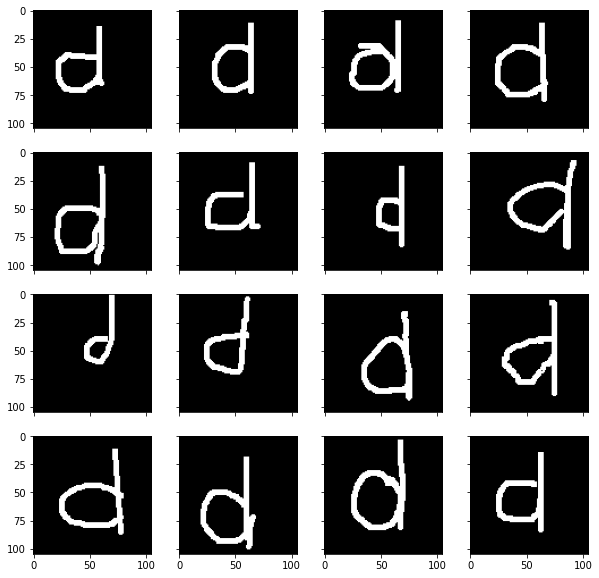

In [ ]:
img, _ = train[0]
print(f'Image shape = {img.shape}')
visualize_symbols(train, 16)

## **Deep Belief Network model**

- Deep Belief Network - a stack of Restricted Bolzmann Machines
- Each layer learns more complex and abstract features
- Used as feature extraction method
